<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU7proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-t0cxh5s8
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-t0cxh5s8
  Resolved https://github.com/pydata/xarray.git to commit 4c2540de54af8d9da4456715d7dcac6b16f330d8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev33+g4c2540de-py3-none-any.whl size=1265489 sha256=1794f44c8aa6fb12f3e5752d37aacbd87bdac67d593efe5e37b1cf97be864c46
  Stored in directory: /tmp/pip-ephem-wheel-cache-h12qqv5k/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.5 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

# Unit 7 Project

In this project, I didn't know what to find. So, I went to the internet and found a data set.

## The Data

I found this data set at data.gov. Here is the [link](https://catalog.data.gov/dataset/graduation-rates-at-public-universities-2019-2021). This gave me the curiosity to look what kind of local data they had and I found this data set. The data shows the Graduation Rates at Public Universities from 2020-2022. It consists of 3 years (2020-2022), different institutions, 3 cohort (4yr, 5yr and 6yr), the number of people in each cohort and the graudation rate of each cohort.

In [3]:
#importing the data
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GraduationRate - Graduation_Rates_at_Public_Universities_2020-2022.csv to GraduationRate - Graduation_Rates_at_Public_Universities_2020-2022.csv
User uploaded file "GraduationRate - Graduation_Rates_at_Public_Universities_2020-2022.csv" with length 9234 bytes


In [4]:
#Setting up the data in order to use
import io

grad = pd.read_csv(io.BytesIO(uploaded['GraduationRate - Graduation_Rates_at_Public_Universities_2020-2022.csv']))

In [5]:
grad = grad.dropna()

In [6]:
grad

,ReportYear,FiceCode,Institution,CohortYear4yr,CohortCount4yr,GradRate4yr,CohortYear5yr,CohortCount5yr,GradRate5yr,CohortYear6yr,CohortCount6yr,GradRate6yr
0,2020,3541,Angelo State University,2016,1452.0,0.3,2015,1336.0,0.5,2014,1285.0,0.5
1,2020,3581,Lamar University,2016,1457.0,0.2,2015,1505.0,0.4,2014,1411.0,0.4
2,2020,3592,Midwestern State University,2016,728.0,0.3,2015,818.0,0.5,2014,834.0,0.5
3,2020,3630,Prairie View A&M University,2016,1834.0,0.2,2015,1614.0,0.4,2014,1602.0,0.4
4,2020,3606,Sam Houston State University,2016,2667.0,0.4,2015,2514.0,0.6,2014,2449.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2022,12826,University of Houston-Downtown,2018,973.0,0.2,2017,856.0,0.3,2016,829.0,0.4
107,2022,13231,University of Houston-Victoria,2018,307.0,0.2,2017,289.0,0.2,2016,313.0,0.3
108,2022,3594,University of North Texas,2018,4511.0,0.5,2017,4581.0,0.6,2016,4454.0,0.6
109,2022,42421,University of North Texas at Dallas,2018,353.0,0.3,2017,290.0,0.4,2016,257.0,0.5


Since there are 12 columns, I will disregard will disregard the *FiceCode* because it's just a form of identification and doesn't affect the data. I will also disregard the *Institution* column since its similar to the *FiceCode* column and since there are too many institutions. Though I may use it as an interaction.

I will categorize the year and cohort year. Graduation rate would be the dependent variable.

## The Model

I will use bambi to detemine the graduation rate of a 4yr, 5yr and 6yr program.

Since the data collected was over three years (2020, 2021, 2022), I will categorize *ReportYear*. I plan to envision a graph.

In [7]:
#grad = grad.query('ReportYear in ["2020","2021", "2022"]')

Nevermind the above comment. Grouping report year only deletes the data. Idk why is it doing that. It drives me insane. So I will not. I want to compare and contrast grad rate so I will make separate models.

The following model is for the 4yrGradRate. I will use CohortYear4yr. The dependent variable is GradRate4yr and the independent variable is Insitituion. I will add ReportYear as another variable that affects the line graph.

In [17]:
model1 = bmb.Model("GradRate4yr ~ Institution + ReportYear", grad, family="negativebinomial")
idata_1 = model1.fit()

Output()

ERROR:pymc.stats.convergence:There were 1224 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 900x900 with 1 Axes>,
 array([<Axes: xlabel='Institution', ylabel='GradRate4yr'>], dtype=object))

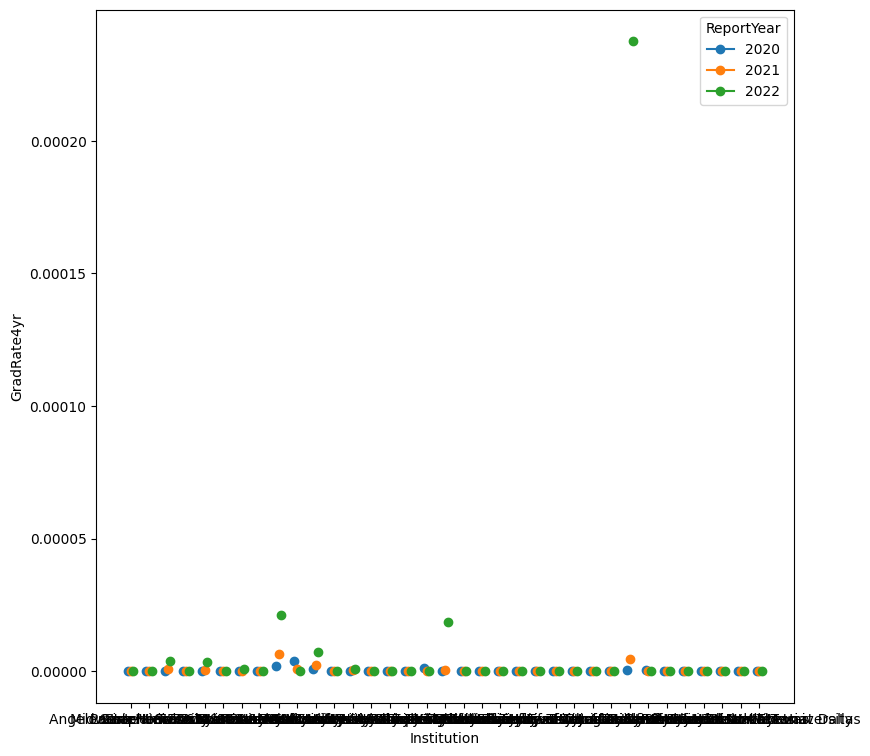

In [30]:
bmb.interpret.plot_predictions(model1,
                               idata_1,
                                ["Institution","ReportYear"],fig_kwargs={"figsize":(9, 9)})

The graph above seems that the 4yr graduation rate is very similar on all years with the exception of a couple of outliers in some schools and some years.

Here I am trying to graph the data for a bspline but it doesn't work.

In [26]:
num_knots = 6
knots = np.linspace(0, 100, num_knots+2)[1:-1]
model_s1 = bmb.Model("GradRate4yr ~ bs(Institution + ReportYear, degree=1, knots=knots)", grad, family="negativebinomial")
idata_s1 = model_s1.fit()

TypeError: Object with dtype category cannot perform the numpy op add

In [28]:
bmb.interpret.plot_predictions(model_s1, idata_s1, "Institution", pps= True)
plt.plot(grad.Institution, grad.GradRate4yr, "C2.", zorder=-3)

NameError: name 'model_s1' is not defined

I am not sure what I did wrong but the model is not working. I don't know in what the code for categorizing the data is erasing the data set. I have use that code in previous projects and I find it weird.

What I had in mind was to somehow categorize *ReportYear* since different school years show different data and one of the years is 2020 so I wanted to see how Covid must affected the graduation rates of 4yr, 5yr and 6yr programs.

I think the dataset may not be the best since it's hard to come up with an independent variable though I decided for *Institutions* to be the independent variable since each school vary in graduation rates.

I was also trying to figure out how bambi works especially with categorical data.

Though I may be thinking that the model would either be categorical or hierarchical categorical model.